In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fdf2 = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 3/fdf2.csv', low_memory=False, sep=",")
fdf2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,4.367593,1,2021,Winter,Friday,Yes,No,0 days 00:25:20
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,0,0,38.917193,-77.025894,...,-77.020000,casual,4.787179,1,2021,Winter,Friday,Yes,No,0 days 00:15:51
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,1.138843,1,2021,Winter,Friday,Yes,No,0 days 00:14:13
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,0.000000,1,2021,Winter,Friday,Yes,No,0 days 00:05:35
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,0.414050,1,2021,Winter,Friday,Yes,No,0 days 00:03:14


### Filter for 2021 and take a 25% sample

In [3]:
# Filter for the year 2021
fdf_2021 = fdf2[fdf2["year"] == 2021]

# Save to a new file
fdf_2021.to_csv("CBS_2021.csv", index=False)

print(f"Filtered dataset for 2021 saved with {len(fdf_2021)} rows.")

Filtered dataset for 2021 saved with 2749881 rows.


In [4]:
# Take a 25% random sample
fdf_2021_sampled = fdf_2021.sample(frac=0.25, random_state=42)

# Save to a new file
fdf_2021_sampled.to_csv("CBS_2021_sample.csv", index=False)

print(f"Sampled dataset for 2021 saved with {len(fdf_2021_sampled)} rows.")


Sampled dataset for 2021 saved with 687470 rows.


### Convert data types

In [5]:
# Convert categorical columns to category type for memory efficiency
fdf_2021_sampled["rideable_type"] = fdf_2021_sampled["rideable_type"].astype("category")
fdf_2021_sampled["start_station_name"] = fdf_2021_sampled["start_station_name"].astype("category")
fdf_2021_sampled["end_station_name"] = fdf_2021_sampled["end_station_name"].astype("category")
fdf_2021_sampled["member_casual"] = fdf_2021_sampled["member_casual"].astype("category")
fdf_2021_sampled["day_of_week"] = fdf_2021_sampled["day_of_week"].astype("category")
fdf_2021_sampled["holiday"] = fdf_2021_sampled["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf_2021_sampled['started_at'] = pd.to_datetime(fdf_2021_sampled['started_at'])
fdf_2021_sampled['ended_at'] = pd.to_datetime(fdf_2021_sampled['ended_at'])


fdf_2021_sampled['month'] = fdf_2021_sampled['month'].astype('int8')
fdf_2021_sampled["year"] = fdf_2021_sampled["year"].astype("str")

fdf_2021_sampled["ride_duration"] = pd.to_timedelta(fdf_2021_sampled["ride_duration"])

In [6]:
fdf_2021_sampled.dtypes

ride_id                         int64
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id               object
end_station_name             category
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
distance                      float64
month                            int8
year                           object
season                         object
day_of_week                  category
holiday                      category
is_weekend                     object
ride_duration         timedelta64[ns]
dtype: object

### Add Ward columns

In [7]:
pip install geopandas shapely pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the wards GeoJSON file
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Load the bike-sharing dataset
df_2021_sampled = pd.read_csv(r"C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2021_sample.csv", low_memory=False)  # Adjust if it's not in CSV format

# Convert DataFrame to GeoDataFrame using start station coordinates
df_2021_sampled["geometry"] = df_2021_sampled.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)
gdf21 = gpd.GeoDataFrame(df_2021_sampled, geometry="geometry", crs="EPSG:4326")  # Assuming WGS84 projection

# Perform spatial join to get the corresponding ward for each station
gdf21 = gpd.sjoin(gdf21, wards_gdf, how="left", predicate="within")

# Keep only necessary columns
gdf21 = gdf21[["ride_id", "start_station_name", "WARD", "NAME"]]

# Save to a new CSV or use further
gdf21.to_csv("bikesharing_with_wards_21.csv", index=False)

In [13]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the wards GeoJSON file
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Load the bike-sharing dataset
df_2021_sampled = pd.read_csv(r"C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2021_sample.csv", low_memory=False)  # Adjust if it's not in CSV format

# Convert DataFrame to GeoDataFrame using start station coordinates
df_2021_sampled["geometry"] = df_2021_sampled.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)
gdf21 = gpd.GeoDataFrame(df_2021_sampled, geometry="geometry", crs="EPSG:4326")  # Assuming WGS84 projection

# Perform spatial join to get the corresponding ward for each station
gdf21 = gpd.sjoin(gdf21, wards_gdf, how="left", predicate="within")  # Use 'op' instead of 'predicate'

# Keep only necessary columns
gdf21 = gdf21[["ride_id", "start_station_name", "WARD", "NAME"]]

# Save to a new CSV or use further
gdf21.to_csv("bikesharing_with_wards_21.csv", index=False)


In [14]:
gdf21

,ride_id,start_station_name,WARD,NAME
0,2226895,11th & M St NW,2.0,Ward 2
1,183935,11th & Girard St NW,1.0,Ward 1
2,1846205,1st & M St SE,6.0,Ward 6
3,2261617,Lincoln Park / 13th & East Capitol St NE,6.0,Ward 6
4,2193498,California St & Florida Ave NW,1.0,Ward 1
...,...,...,...,...
687465,2612249,New Hampshire Ave & T St NW,2.0,Ward 2
687466,2666790,Henry Bacon Dr & Lincoln Memorial Circle NW,2.0,Ward 2
687467,2229214,New York Ave & 15th St NW,2.0,Ward 2
687468,978448,3rd & H St NW,6.0,Ward 6


In [15]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [17]:
# Load the bikesharing dataset
fdf = pd.read_csv("CBS_2021_sample.csv", low_memory=False)  # Adjust format if needed

# Load the wards GeoJSON
wards = gpd.read_file("wards_from_2022.geojson")

In [18]:
# Convert start station coordinates to geometry points
fdf['geometry'] = fdf.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf21 = gpd.GeoDataFrame(fdf, geometry='geometry', crs="EPSG:4326")

In [19]:
fdf_gdf21 = gpd.sjoin(fdf_gdf21, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename the column for clarity
fdf_gdf21.rename(columns={'WARD': 'start_ward'}, inplace=True)

In [20]:
# Convert end station coordinates to geometry points
fdf['end_geometry'] = fdf.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf_end = gpd.GeoDataFrame(fdf, geometry='end_geometry', crs="EPSG:4326")

# Spatial join for end stations
fdf_gdf_end = gpd.sjoin(fdf_gdf_end, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename column
fdf_gdf_end.rename(columns={'WARD': 'end_ward'}, inplace=True)

# Merge back with the main dataset
fdf_gdf21['end_ward'] = fdf_gdf_end['end_ward']

### New working dataframe for 2021: fdf_gdf21

In [21]:
fdf_gdf21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,season,day_of_week,holiday,is_weekend,ride_duration,geometry,index_right,start_ward,end_ward
0,2226895,classic_bike,2021-10-22 22:26:26,2021-10-22 22:33:05,11th & M St NW,31266.0,11th & O St NW,31286.0,38.905578,-77.027313,...,2021,Autumn,Friday,No,No,0 days 00:06:39,POINT (-77.02731 38.90558),3.0,2.0,2.0
1,183935,classic_bike,2021-03-03 08:28:05,2021-03-03 08:30:38,11th & Girard St NW,31126.0,10th & Florida Ave NW,31120.0,38.925636,-77.027112,...,2021,Spring,Wednesday,No,No,0 days 00:02:33,POINT (-77.02711 38.92564),4.0,1.0,1.0
2,1846205,classic_bike,2021-09-17 14:29:27,2021-09-17 14:41:37,1st & M St SE,31650.0,11th & C St SE,31659.0,38.876893,-77.006072,...,2021,Autumn,Friday,No,No,0 days 00:12:10,POINT (-77.00607 38.87689),1.0,6.0,6.0
3,2261617,classic_bike,2021-10-26 12:30:15,2021-10-26 12:33:48,Lincoln Park / 13th & East Capitol St NE,31619.0,Eastern Market / 7th & North Carolina Ave SE,31610.0,38.890461,-76.988355,...,2021,Autumn,Tuesday,No,No,0 days 00:03:33,POINT (-76.98836 38.89046),1.0,6.0,6.0
4,2193498,classic_bike,2021-10-20 07:25:39,2021-10-20 07:33:46,California St & Florida Ave NW,31116.0,17th & K St NW,31213.0,38.917761,-77.040620,...,2021,Autumn,Wednesday,No,No,0 days 00:08:07,POINT (-77.04062 38.91776),4.0,1.0,2.0


In [22]:
print(fdf_gdf21['start_ward'].isna().sum())
print(fdf_gdf21['end_ward'].isna().sum())

81913
81523


In [23]:
fdf_gdf21.dropna(subset=['start_ward', 'end_ward'], inplace=True)

In [25]:
fdf_gdf21.drop(columns=['index_right', 'geometry'], inplace=True)

In [26]:
fdf_gdf21['start_ward'] = fdf_gdf21['start_ward'].astype('int')
fdf_gdf21['end_ward'] = fdf_gdf21['end_ward'].astype('int')

In [27]:
# Check unique values for start and end wards
unique_values_start = sorted(fdf_gdf21['start_ward'].unique())
unique_values_end = sorted(fdf_gdf21['end_ward'].unique())
print(unique_values_start)
print(unique_values_end)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


### Cleaning

In [28]:
print(f"Number of rows before cleaning: {len(fdf_gdf21)}")

Number of rows before cleaning: 589850


In [29]:
# Convert 'ride_duration' column to Timedelta if it's not already
fdf_gdf21["ride_duration"] = pd.to_timedelta(fdf_gdf21["ride_duration"], errors='coerce')

In [30]:
# Drop rows where ride_duration is negative 

fdf_gdf = fdf_gdf21[fdf_gdf21["ride_duration"] >= pd.Timedelta(0)]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf21)}")

Number of rows after cleaning: 589850


In [31]:
# Overwrite fdf_gdf21 by dropping rows where 'end_station_name' is '0'
fdf_gdf21 = fdf_gdf21[fdf_gdf21["end_station_name"] != "0"]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf21)}")

Number of rows after cleaning: 545627


In [32]:
# Overwrite fdf_gdf21 by dropping rows where "ride_distance" is 0
fdf_gdf21 = fdf_gdf21[fdf_gdf21["distance"] != 0]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf21)}")

Number of rows after cleaning: 513661


In [33]:
# If ride_duration is in Timedelta format, create ride_duration_min
fdf_gdf21["ride_duration_min"] = fdf_gdf21["ride_duration"].dt.total_seconds() / 60

In [34]:
# Drop rows where ride_duration_min is 0
fdf_gdf21 = fdf_gdf21[fdf_gdf21["ride_duration_min"] != 0]

# Optionally, check the result
print(f"Number of rows after cleaning: {len(fdf_gdf21)}")

Number of rows after cleaning: 513658


### Ride Distance 

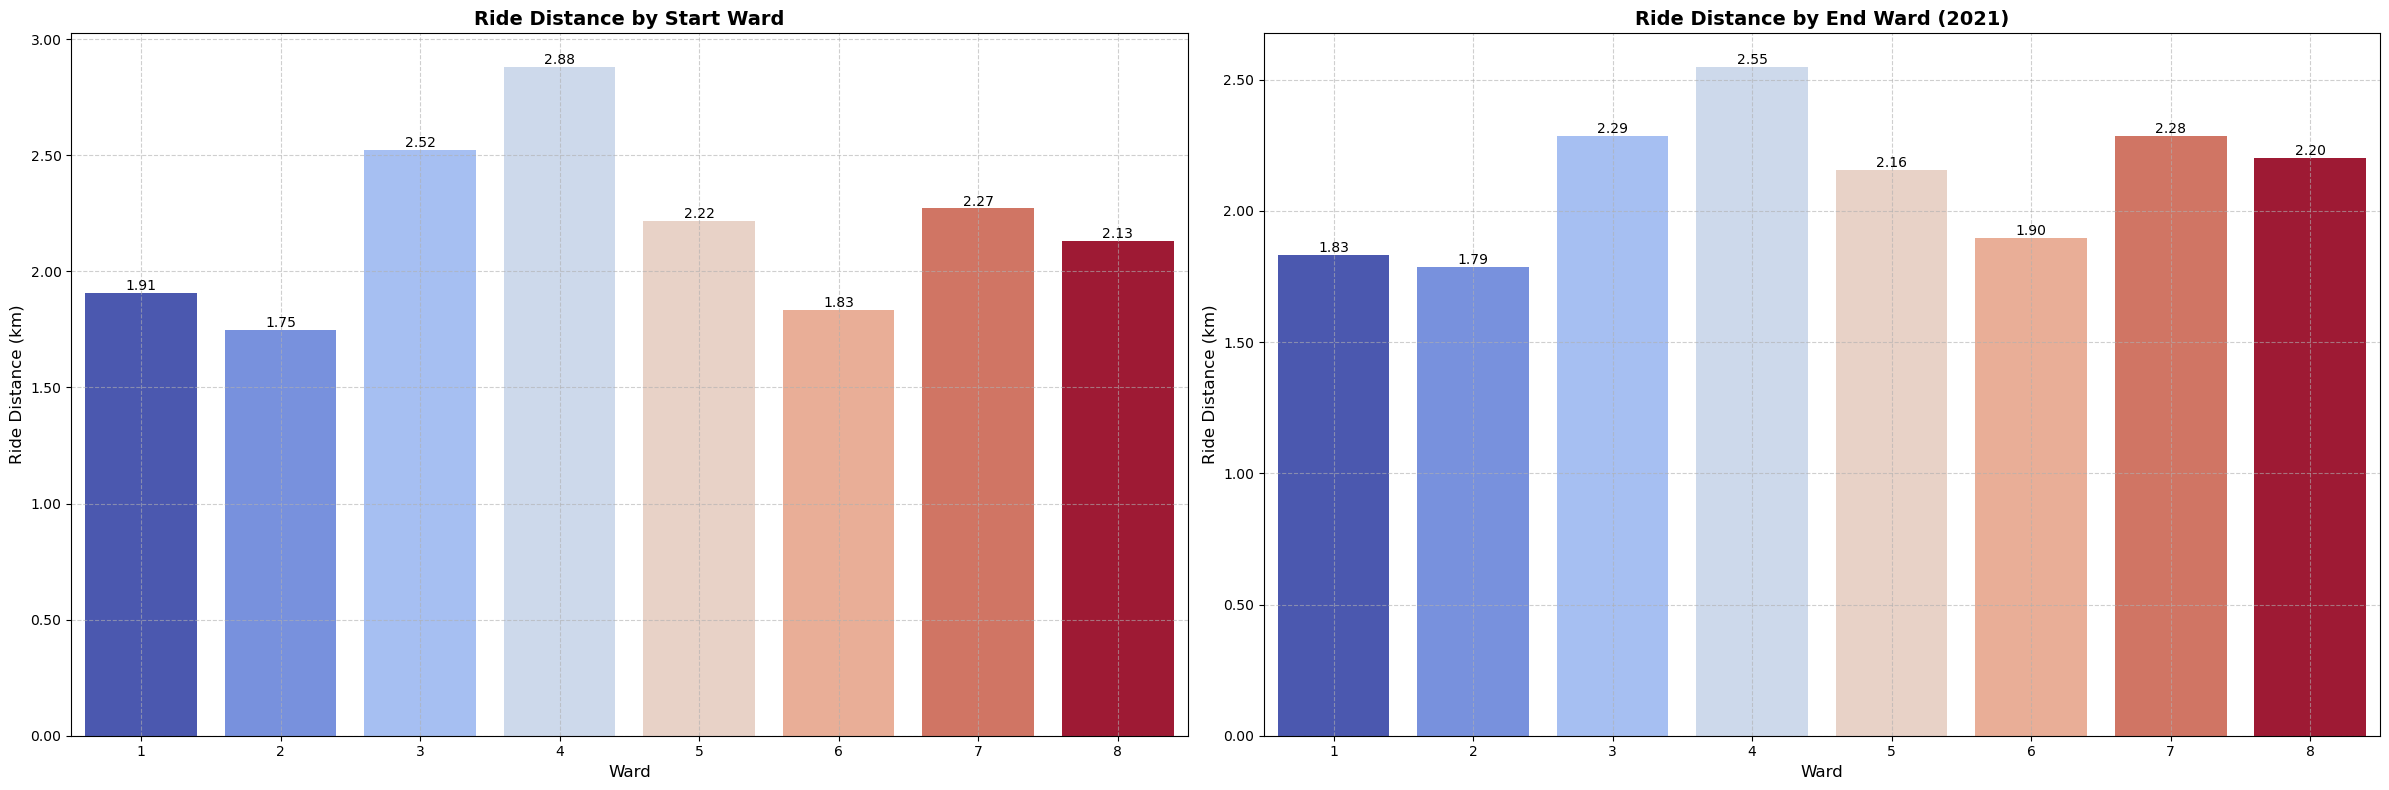

In [40]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Distance by Start Ward
sns.barplot(x="start_ward", 
            y="distance", 
            data=fdf_gdf21,
            palette="coolwarm",
            hue="start_ward",  
            errorbar=None,
            ax=axs[0],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Distance (km)", fontsize=12)
axs[0].set_title("Ride Distance by Start Ward", fontsize=14, fontweight="bold")

# Plot for Ride Distance by End Ward
sns.barplot(x="end_ward", 
            y="distance", 
            data=fdf_gdf21,
            palette="coolwarm",
            hue="end_ward", 
            errorbar=None,
            ax=axs[1],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Distance (km)", fontsize=12)
axs[1].set_title("Ride Distance by End Ward (2021)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

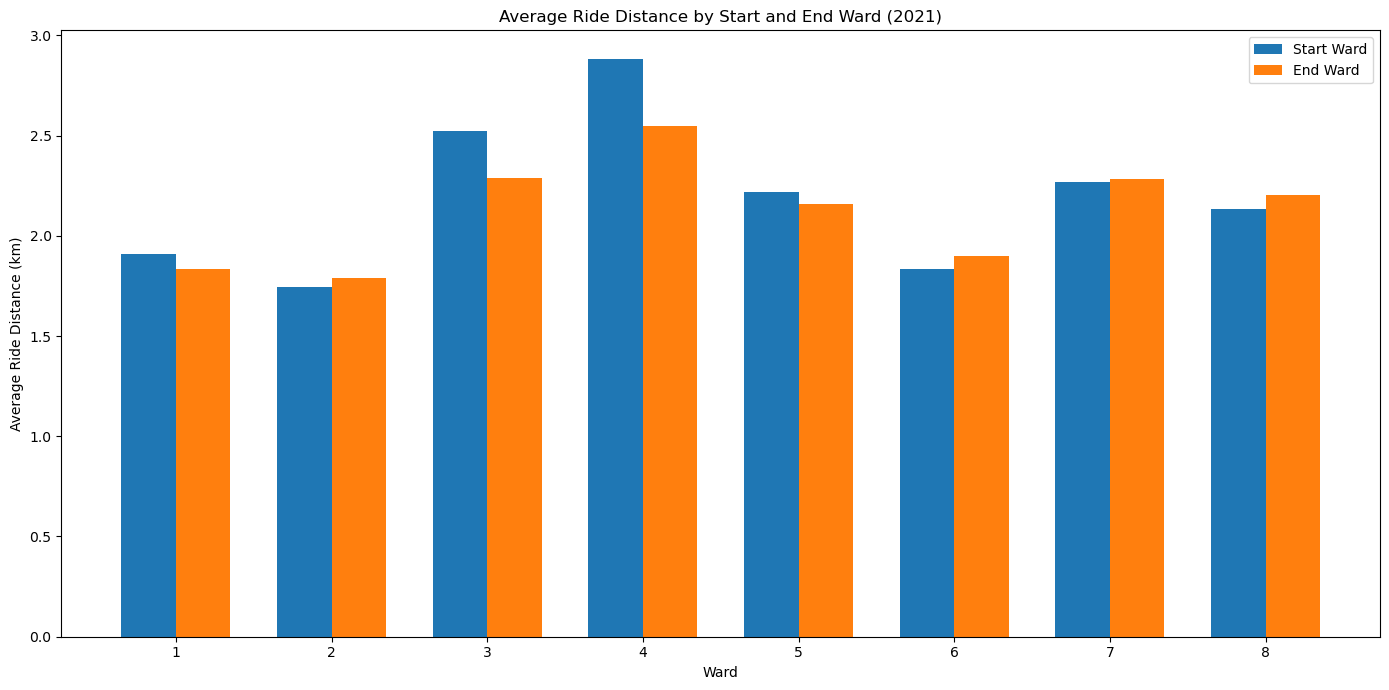

In [43]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare the data for plotting
start_ward_distances = fdf_gdf21.groupby('start_ward')['distance'].mean().reset_index()
end_ward_distances = fdf_gdf21.groupby('end_ward')['distance'].mean().reset_index()

# Merge the dataframes on ward
ward_distances = pd.merge(start_ward_distances, end_ward_distances, left_on='start_ward', right_on='end_ward', suffixes=('_start', '_end'))

# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(ward_distances))

# Bar plot for start ward distances
plt.bar(index, ward_distances['distance_start'], bar_width, label='Start Ward')

# Bar plot for end ward distances
plt.bar(index + bar_width, ward_distances['distance_end'], bar_width, label='End Ward')

# Add labels and title
plt.xlabel('Ward')
plt.ylabel('Average Ride Distance (km)')
plt.title('Average Ride Distance by Start and End Ward (2021)')
plt.xticks(index + bar_width / 2, ward_distances['start_ward'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

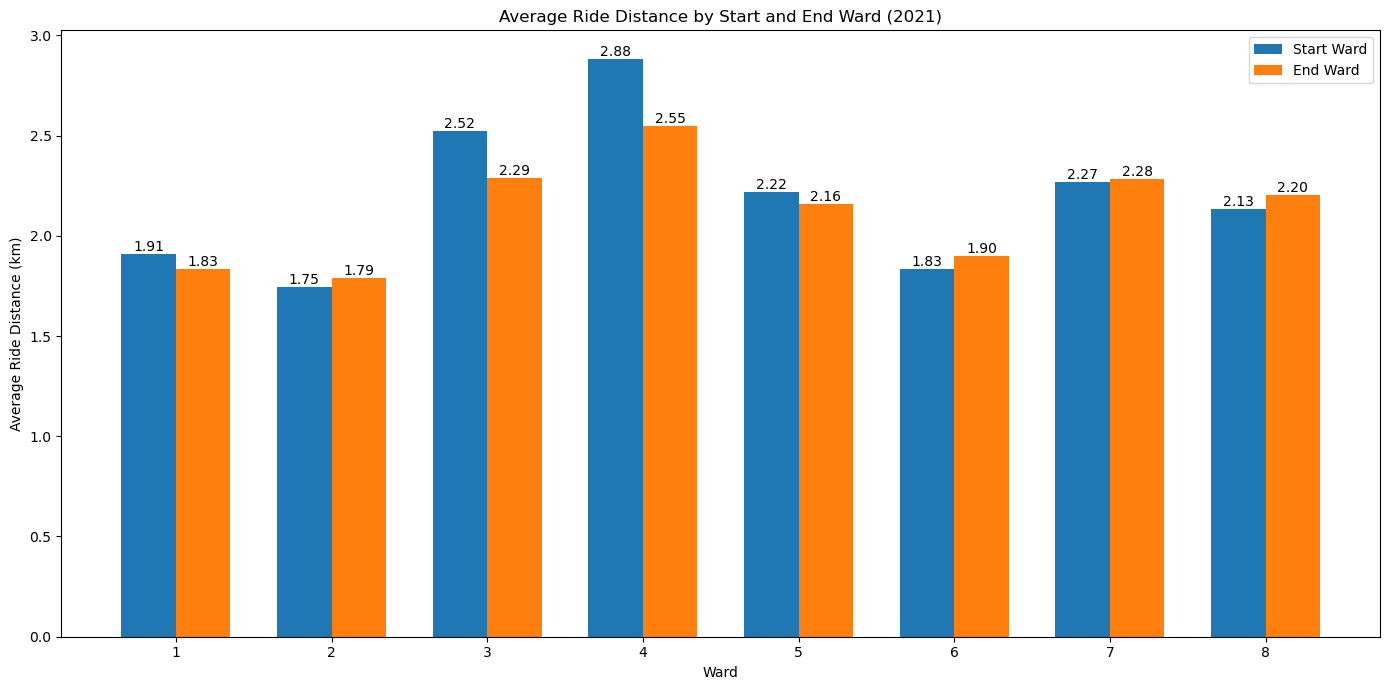

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
start_ward_distances = fdf_gdf21.groupby('start_ward')['distance'].mean().reset_index()
end_ward_distances = fdf_gdf21.groupby('end_ward')['distance'].mean().reset_index()

# Merge the dataframes on ward
ward_distances = pd.merge(start_ward_distances, end_ward_distances, left_on='start_ward', right_on='end_ward', suffixes=('_start', '_end'))

# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(ward_distances))

# Bar plot for start ward distances
bars_start = plt.bar(index, ward_distances['distance_start'], bar_width, label='Start Ward')

# Bar plot for end ward distances
bars_end = plt.bar(index + bar_width, ward_distances['distance_end'], bar_width, label='End Ward')

# Add labels on top of each bar
for bar in bars_start:
    height = bar.get_height()
    if height > 0:  # Optionally filter out zero-height bars
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_end:
    height = bar.get_height()
    if height > 0:  # Optionally filter out zero-height bars
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Ward')
plt.ylabel('Average Ride Distance (km)')
plt.title('Average Ride Distance by Start and End Ward (2021)')
plt.xticks(index + bar_width / 2, ward_distances['start_ward'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Ride Duration

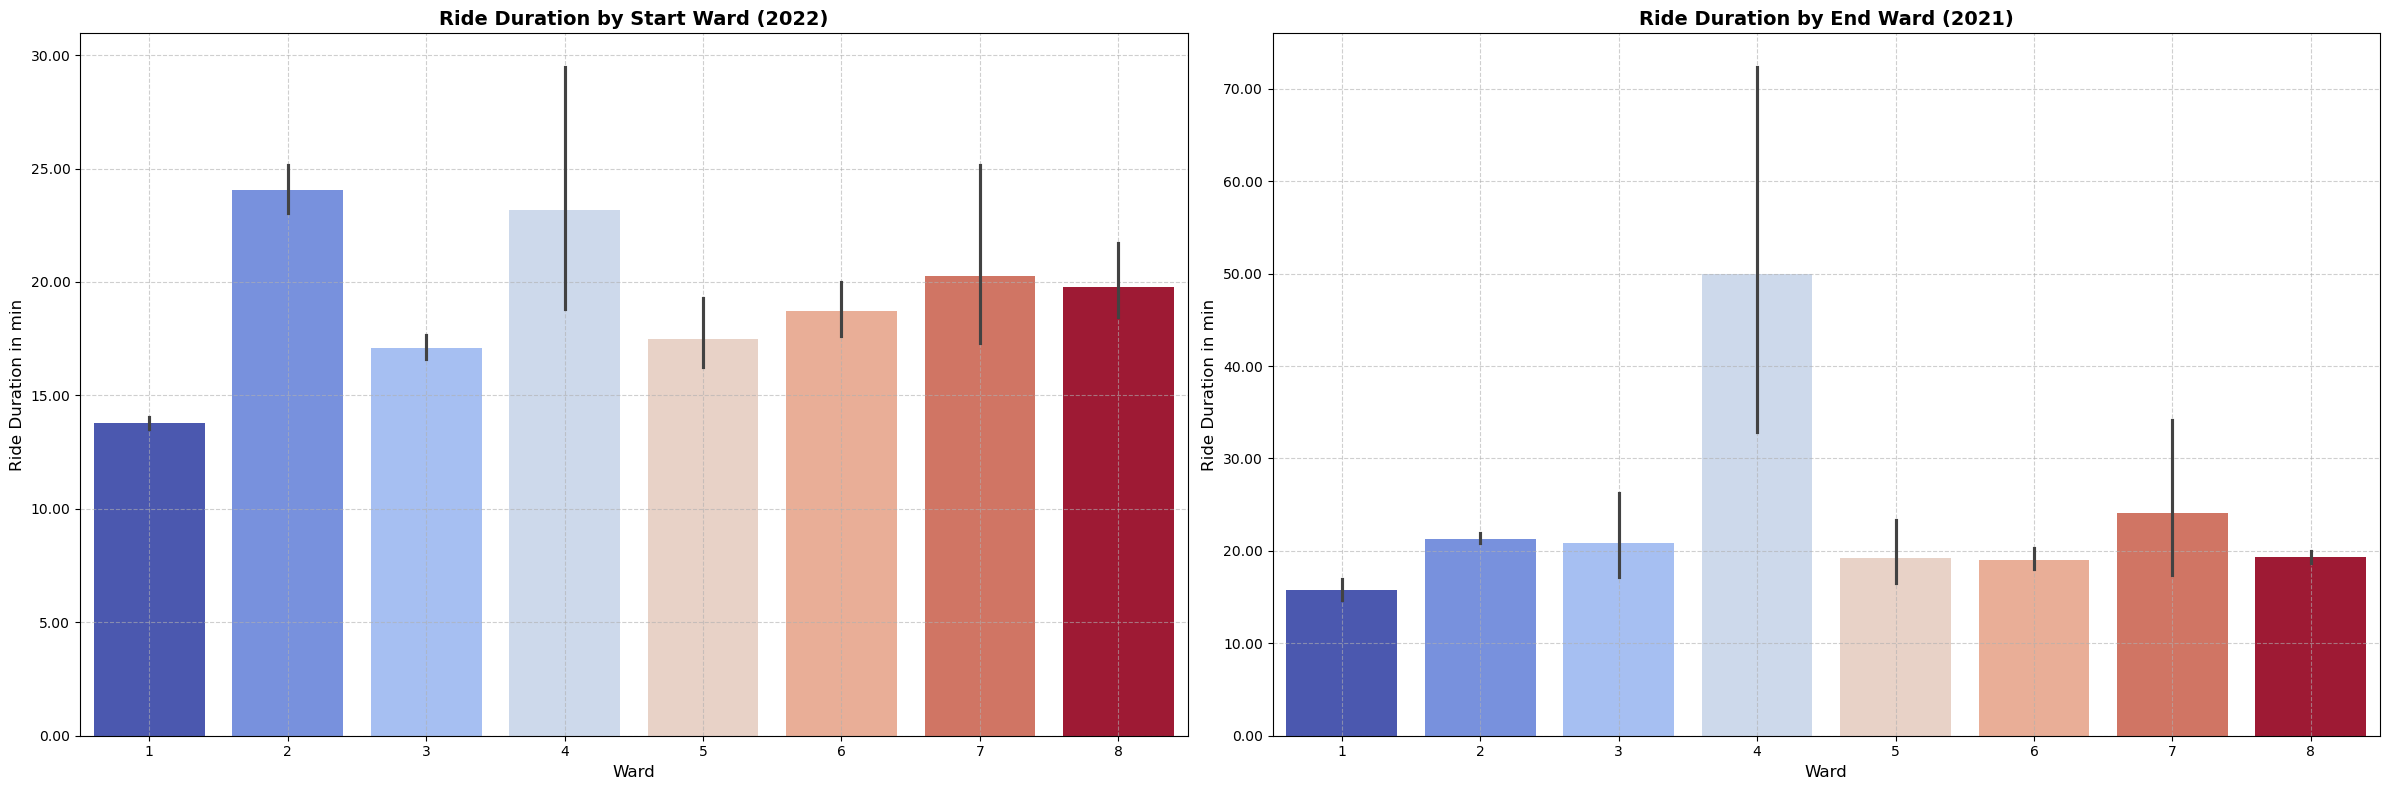

In [45]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Duration by Start Ward
sns.barplot(x="start_ward", 
            y="ride_duration_min", 
            data=fdf_gdf21,
            hue="start_ward",
            palette="coolwarm",
            legend=False,
            ax=axs[0]
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Duration in min", fontsize=12)
axs[0].set_title("Ride Duration by Start Ward (2022)", fontsize=14, fontweight="bold")

# Plot for Ride Duration by End Ward
sns.barplot(x="end_ward", 
            y="ride_duration_min", 
            data=fdf_gdf21,
            hue="end_ward",
            palette="coolwarm",
            legend=False,
            ax=axs[1]
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Duration in min", fontsize=12)
axs[1].set_title("Ride Duration by End Ward (2021)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

### Check for longer rides > 5 days

In [102]:
import pandas as pd

# Ensure ride_duration is a Timedelta type
fdf_gdf21['ride_duration'] = pd.to_timedelta(fdf_gdf21['ride_duration'])

# Filter rides that lasted more than 5 days
long_rides = fdf_gdf21[fdf_gdf21['ride_duration'] > pd.Timedelta(days=5)]

# Display the filtered DataFrame
long_rides.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
7272,1137888,docked_bike,2021-07-04 19:36:38,2021-07-17 11:57:34,14th & D St NW / Ronald Reagan Building,31231.0,4th & E St SW,31244.0,38.894514,-77.031617,...,7,2021,Summer,Sunday,Yes,Yes,12 days 16:20:56,2,6,18260.933333
15514,781231,docked_bike,2021-05-26 19:29:46,2021-06-04 08:11:53,7th & K St NW,31653.0,14th & R St NW,31202.0,38.902674,-77.021392,...,5,2021,Spring,Wednesday,No,No,8 days 12:42:07,6,2,12282.116667
18972,1701250,docked_bike,2021-09-03 15:18:22,2021-09-20 10:13:24,Thomas Jefferson St NW & Water/K St NW,31293.0,C & O Canal & Wisconsin Ave NW,31225.0,38.902826,-77.060173,...,9,2021,Autumn,Friday,No,No,16 days 18:55:02,2,2,24175.033333
25557,913411,docked_bike,2021-06-12 15:04:13,2021-06-18 19:17:21,14th St & New York Ave NW,31216.0,15th & P St NW,31201.0,38.899632,-77.031686,...,6,2021,Summer,Saturday,No,Yes,6 days 04:13:08,2,2,8893.133333
29303,1124387,docked_bike,2021-07-03 20:23:30,2021-07-19 17:51:02,4th St & Madison Dr NW,31288.0,14th & D St SE,31663.0,38.890496,-77.017247,...,7,2021,Summer,Saturday,No,Yes,15 days 21:27:32,2,6,22887.533333


### Ride Count

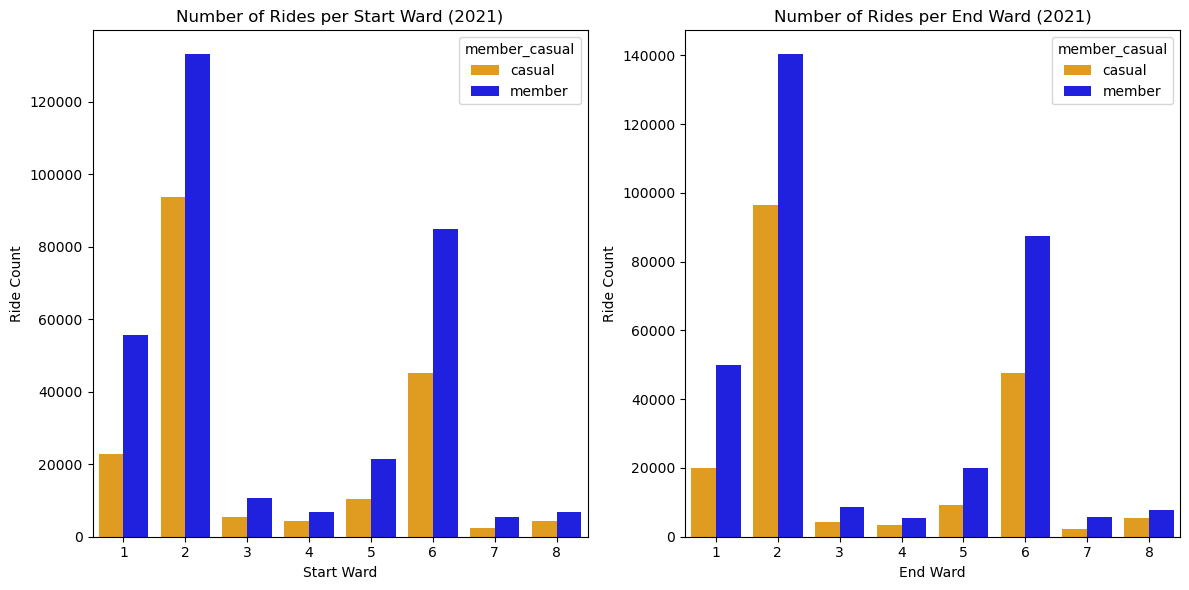

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom palette with different colors for each member type
palette = {"member": "blue", "casual": "orange"}

# Merge start_ward_counts and end_ward_counts with fdf_gdf22 to include member_casual
start_ward_counts = fdf_gdf21.groupby(['start_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')
end_ward_counts = fdf_gdf21.groupby(['end_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')

# Set the size of the plots
plt.figure(figsize=(12, 6))

# Plot the rides per start ward
plt.subplot(1, 2, 1)
sns.barplot(data=start_ward_counts, x="start_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per Start Ward (2021)')
plt.xlabel('Start Ward')
plt.ylabel('Ride Count')

# Plot the rides per end ward
plt.subplot(1, 2, 2)
sns.barplot(data=end_ward_counts, x="end_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per End Ward (2021)')
plt.xlabel('End Ward')
plt.ylabel('Ride Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

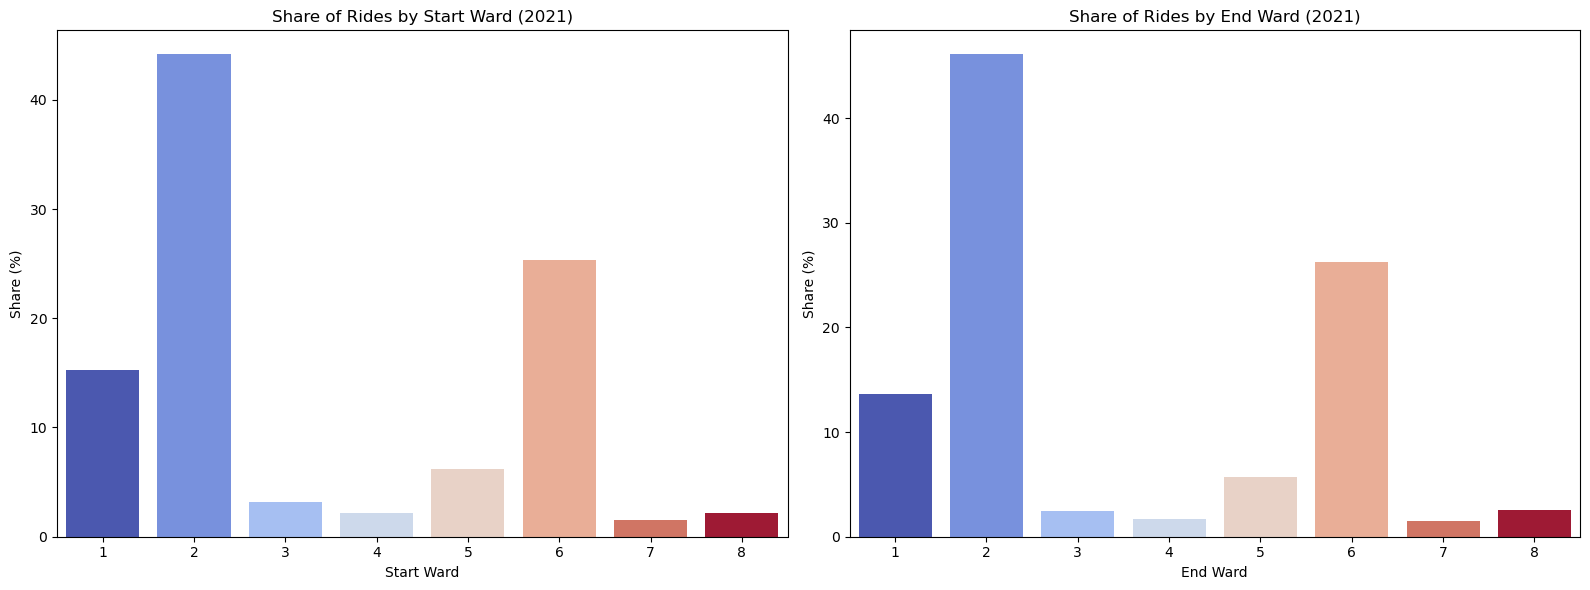

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the share of rides by start and end ward
start_ward_share = fdf_gdf21['start_ward'].value_counts(normalize=True) * 100
end_ward_share = fdf_gdf21['end_ward'].value_counts(normalize=True) * 100

# Convert to DataFrame for easier plotting
start_ward_share_df = start_ward_share.reset_index()
start_ward_share_df.columns = ['Ward', 'Share (%)']

end_ward_share_df = end_ward_share.reset_index()
end_ward_share_df.columns = ['Ward', 'Share (%)']

# Plot the data
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Start ward share plot
sns.barplot(data=start_ward_share_df, x='Ward', y='Share (%)', hue='Ward', palette='coolwarm', ax=axs[0], legend=False)
axs[0].set_title('Share of Rides by Start Ward (2021)')
axs[0].set_xlabel('Start Ward')
axs[0].set_ylabel('Share (%)')

# End ward share plot
sns.barplot(data=end_ward_share_df, x='Ward', y='Share (%)', hue='Ward', palette='coolwarm', ax=axs[1], legend=False)
axs[1].set_title('Share of Rides by End Ward (2021)')
axs[1].set_xlabel('End Ward')
axs[1].set_ylabel('Share (%)')

plt.tight_layout()
plt.show()

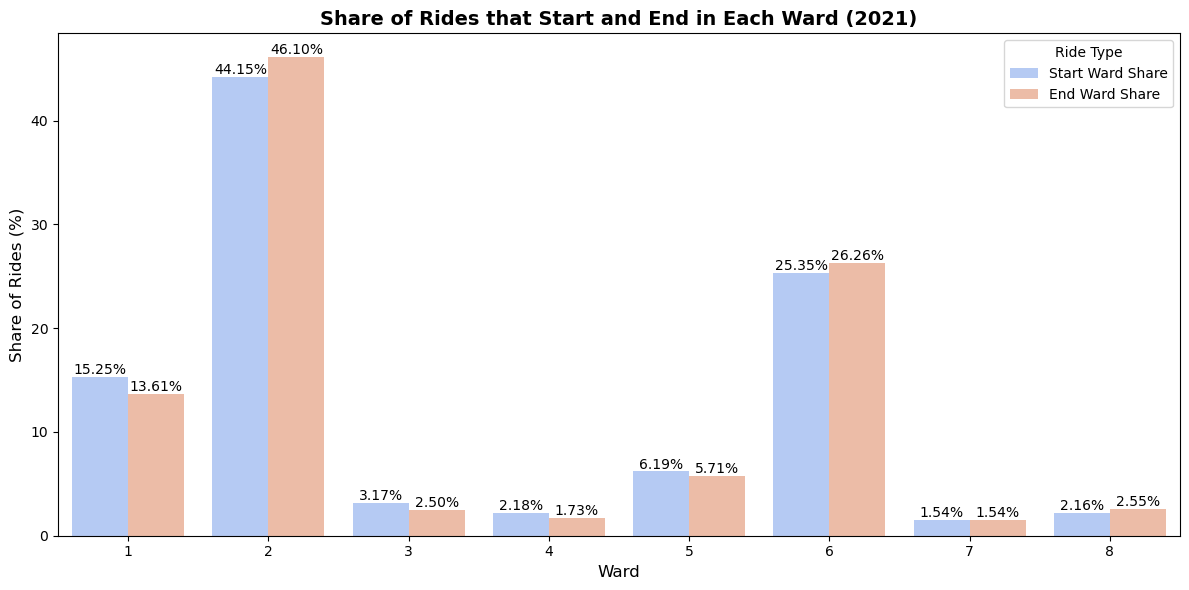

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the share of rides that start in each ward
start_ward_share = fdf_gdf21['start_ward'].value_counts(normalize=True).sort_index() * 100

# Calculate the share of rides that end in each ward
end_ward_share = fdf_gdf21['end_ward'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for easier plotting
ward_share_df = pd.DataFrame({
    'Start Ward Share': start_ward_share,
    'End Ward Share': end_ward_share
}).reset_index().rename(columns={'index': 'Ward'})

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Ward', 
    y='value', 
    hue='variable', 
    data=pd.melt(ward_share_df, id_vars=['Ward'], value_vars=['Start Ward Share', 'End Ward Share']), 
    palette='coolwarm'
)

# Add labels on top of each bar, but only if the height is greater than 0
for p in ax.patches:
    height = p.get_height()
    if height > 0.01:  # Avoid showing labels for bars with nearly 0%
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # Offset the text above the bar
                    textcoords='offset points')

plt.xlabel('Ward', fontsize=12)
plt.ylabel('Share of Rides (%)', fontsize=12)
plt.title('Share of Rides that Start and End in Each Ward (2021)', fontsize=14, fontweight='bold')
plt.legend(title='Ride Type')

# Show the plot
plt.tight_layout()
plt.show()

### Mean rides per day and per Ward

In [55]:
# Ensure 'started_at' is in datetime format
fdf_gdf21['started_at'] = pd.to_datetime(fdf_gdf21['started_at'])

# Group by start_ward and date, then count the number of rides per day
rides_per_day = fdf_gdf21.groupby([fdf_gdf21['started_at'].dt.date, 'start_ward']).size().reset_index(name='ride_count')

# Calculate the mean number of rides per day for each ward
mean_rides_per_day = rides_per_day.groupby('start_ward')['ride_count'].mean().reset_index(name='mean_rides_per_day')

# Display the result
print(mean_rides_per_day)

   start_ward  mean_rides_per_day
0           1          214.673973
1           2          621.367123
2           3           44.621918
3           4           30.742466
4           5           87.073973
5           6          356.715068
6           7           21.769231
7           8           30.378082


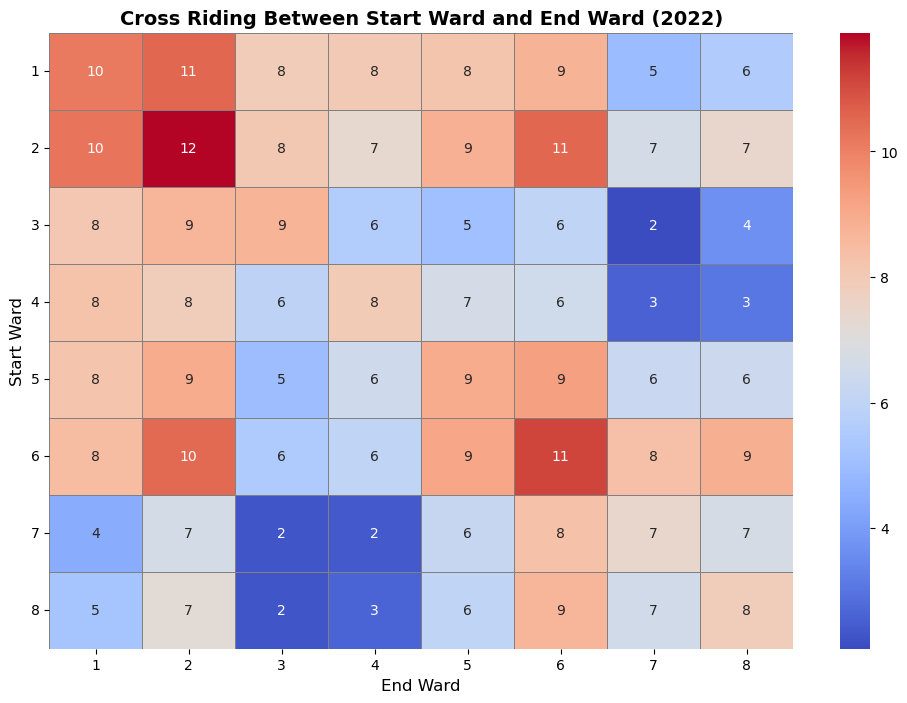

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a pivot table to count the rides between start_ward and end_ward
cross_riding = fdf_gdf21.pivot_table(index='start_ward', columns='end_ward', values='ride_id', aggfunc='count', fill_value=0)

# Apply log scale transformation if necessary (optional)
cross_riding_log = np.log1p(cross_riding)  # log(1 + x) to avoid log(0) issues

plt.figure(figsize=(12, 8))

# Create heatmap with formatting improvements
ax = sns.heatmap(cross_riding_log, 
                annot=True, 
                fmt=".0f",  # Use integer format (rounded)
                cmap="coolwarm",  # Better contrast
                cbar=True, 
                linewidths=0.5,  # Add thin grid lines
                linecolor="gray",
                annot_kws={"size": 10}
                )

# Improve readability
plt.title('Cross Riding Between Start Ward and End Ward (2022)', fontsize=14, fontweight="bold")
plt.xlabel('End Ward', fontsize=12)
plt.ylabel('Start Ward', fontsize=12)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

### Number of stations for Ward 2 and 7

In [66]:
# Filter for Ward 2 and Ward 7
ward_2_stations = fdf_gdf21[fdf_gdf21['start_ward'] == 2]['start_station_name'].nunique()
ward_7_stations = fdf_gdf21[fdf_gdf21['start_ward'] == 7]['start_station_name'].nunique()

print(f"Total number of stations in Ward 2: {ward_2_stations}")
print(f"Total number of stations in Ward 7: {ward_7_stations}")

Total number of stations in Ward 2: 103
Total number of stations in Ward 7: 28


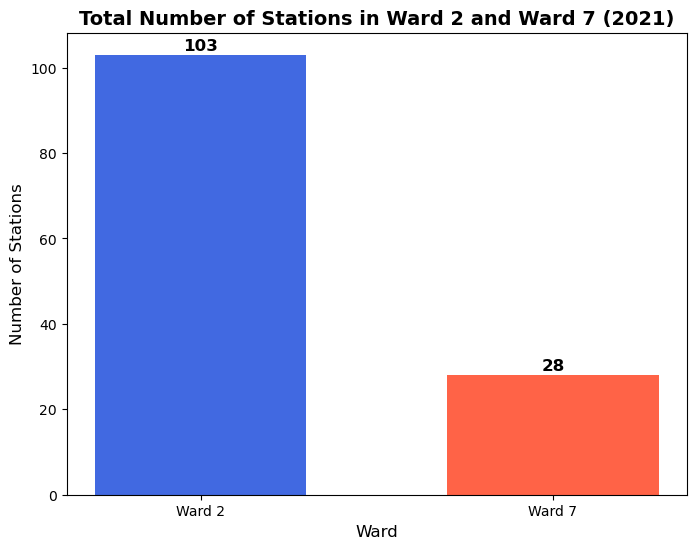

In [67]:
import matplotlib.pyplot as plt

# Data for the plot
wards = ['Ward 2', 'Ward 7']
stations = [ward_2_stations, ward_7_stations]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(wards, stations, color=['royalblue', 'tomato'], width=0.6)

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Position slightly above the bar
            f"{int(bar.get_height()):,}",  # Format with commas (adjust if needed)
            ha='center', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Total Number of Stations in Ward 2 and Ward 7 (2021)', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines

In [68]:
filtered_df = fdf_gdf21[fdf_gdf21['start_station_name'] == '0']
filtered_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
22,363413,electric_bike,2021-04-03 14:24:07,2021-04-03 14:49:37,0,0,Jefferson Dr & 14th St SW,31247.0,38.90,-77.03,...,4,2021,Spring,Saturday,No,Yes,0 days 00:25:30,2,2,25.500000
48,726090,electric_bike,2021-05-20 17:23:21,2021-05-20 17:49:53,0,0,8th & H St NW,31228.0,38.92,-76.98,...,5,2021,Spring,Thursday,No,No,0 days 00:26:32,5,2,26.533333
116,2368001,electric_bike,2021-11-06 17:06:48,2021-11-06 17:35:21,0,0,15th St & Pennsylvania Ave NW,31129.0,38.89,-77.01,...,11,2021,Autumn,Saturday,No,Yes,0 days 00:28:33,6,2,28.550000
160,116435,electric_bike,2021-02-06 17:00:56,2021-02-06 17:04:41,0,0,Van Ness Metro / UDC,31300.0,38.94,-77.06,...,2,2021,Winter,Saturday,No,Yes,0 days 00:03:45,3,3,3.750000
239,556646,electric_bike,2021-04-29 17:21:16,2021-04-29 17:38:15,0,0,1st & K St SE,31628.0,38.90,-77.02,...,4,2021,Spring,Thursday,No,No,0 days 00:16:59,2,6,16.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687170,1095774,electric_bike,2021-07-01 07:44:35,2021-07-01 08:03:21,0,0,2nd & G St NE,31639.0,38.90,-77.00,...,7,2021,Summer,Thursday,No,No,0 days 00:18:46,6,6,18.766667
687234,1254156,electric_bike,2021-07-16 17:54:12,2021-07-16 18:12:41,0,0,Wisconsin Ave & Newark St NW,31302.0,38.90,-77.05,...,7,2021,Summer,Friday,No,No,0 days 00:18:29,2,3,18.483333
687305,724115,electric_bike,2021-05-20 13:57:48,2021-05-20 14:34:09,0,0,2nd & V St SW / James Creek Marina,31667.0,38.90,-76.97,...,5,2021,Spring,Thursday,No,No,0 days 00:36:21,5,6,36.350000
687327,1114661,electric_bike,2021-07-03 10:34:14,2021-07-03 10:53:03,0,0,8th & H St NW,31228.0,38.97,-77.03,...,7,2021,Summer,Saturday,No,Yes,0 days 00:18:49,4,2,18.816667


In [69]:
import numpy as np
from scipy.spatial import KDTree

# Filter out rows where start_station_name is NOT "0" (valid stations)
valid_stations = fdf_gdf21[fdf_gdf21["start_station_name"] != "0"][["start_lat", "start_lng", "start_station_name"]]

# Build a KDTree for fast nearest neighbor search
station_tree = KDTree(valid_stations[["start_lat", "start_lng"]].values)

# Get indices of missing stations
missing_indices = fdf_gdf21[fdf_gdf21["start_station_name"] == "0"].index

# Find the nearest valid station for each missing station
for idx in missing_indices:
    lat, lng = fdf_gdf21.loc[idx, ["start_lat", "start_lng"]]
    dist, nearest_idx = station_tree.query([lat, lng])  # Find nearest valid station
    fdf_gdf21.at[idx, "start_station_name"] = valid_stations.iloc[nearest_idx]["start_station_name"]

# Check results
print(fdf_gdf21.loc[missing_indices, ["start_station_name", "start_lat", "start_lng"]])

                      start_station_name  start_lat  start_lng
22             13th St & New York Ave NW      38.90     -77.03
48           New York Ave & Hecht Ave NE      38.92     -76.98
116     Constitution Ave & 2nd St NW/DOL      38.89     -77.01
160       Connecticut Ave & Tilden St NW      38.94     -77.06
239        5th St & Massachusetts Ave NW      38.90     -77.02
...                                  ...        ...        ...
687170                     6th & H St NE      38.90     -77.00
687234     22nd & I St NW / Foggy Bottom      38.90     -77.05
687305      Oklahoma Ave & Benning Rd NE      38.90     -76.97
687327  Georgia Ave & Piney Branch Rd NW      38.97     -77.03
687371                 Fort Totten Metro      38.95     -77.00

[15987 rows x 3 columns]


In [70]:
ward_counts = fdf_gdf.groupby(["start_ward", "end_ward"]).size().reset_index(name="ride_count")

# Display results
print(ward_counts)

    start_ward  end_ward  ride_count
0            1         1       31632
1            1         2       39567
2            1         3        3221
3            1         4        4265
4            1         5        4484
..         ...       ...         ...
59           8         4          23
60           8         5         521
61           8         6        6242
62           8         7         792
63           8         8        4259

[64 rows x 3 columns]


### Heatmap Crossriding between Wards

In [71]:
# Create a pivot table with start_ward as rows and end_ward as columns
ward_matrix = ward_counts.pivot(index="start_ward", columns="end_ward", values="ride_count").fillna(0)

# Display the matrix
print(ward_matrix)

end_ward        1       2     3     4      5      6     7     8
start_ward                                                     
1           31632   39567  3221  4265   4484   6699   168   292
2           30763  169741  3932  2072   7895  39108   813  1743
3            3694    6598  8425   462    254    451    10    44
4            4674    3163   514  5180   1104    740    18    53
5            4315    8740   209   907  12238  11385   651   627
6            5150   36986   309   487  10571  79702  4386  7422
7              98     830    15    21    678   4323  3628   888
8             204    1384    11    23    521   6242   792  4259


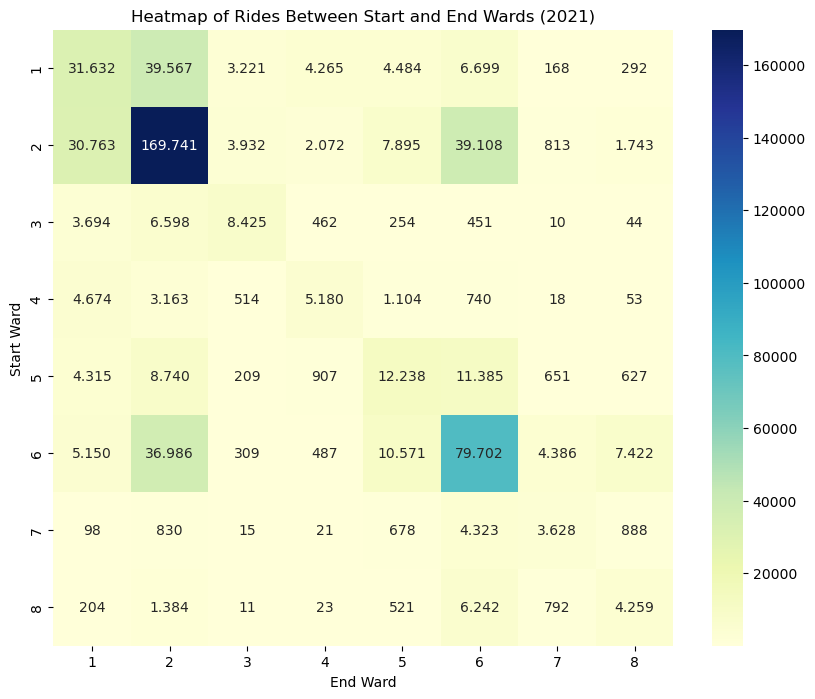

In [72]:
# Heatmap to show rides between wards
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# Set locale to use dots as thousands separator
locale.setlocale(locale.LC_NUMERIC, 'de_DE.UTF-8')  # For German formatting

# Function to format numbers with dots as thousands separator
def format_with_dot(x):
    return locale.format_string("%d", x, grouping=True)

# Apply the format to the matrix using map
formatted_matrix = ward_matrix.stack().map(format_with_dot).unstack()

# Create a heatmap with formatted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    ward_matrix, 
    annot=formatted_matrix, 
    cmap="YlGnBu", 
    fmt="s",  # Treats the annotations as strings
    cbar=True,
    annot_kws={"size": 10}  # Smaller font size for annotations
)

# Set labels and title
plt.title('Heatmap of Rides Between Start and End Wards (2021)')
plt.xlabel('End Ward')
plt.ylabel('Start Ward')

# Show the plot
plt.show()

### Station density by Ward

In [88]:
import geopandas as gpd

# Load GeoJSON data
geojson_file = "wards_from_2022.geojson"
wards_gdf = gpd.read_file(geojson_file)

# 🔹 Convert ALL datetime columns to strings
for col in wards_gdf.select_dtypes(include=["datetime64[ns]"]).columns:
    wards_gdf[col] = wards_gdf[col].astype(str)

In [89]:
import json

# 🔹 Convert GeoDataFrame to a JSON string and force datetime conversion
wards_json = json.loads(json.dumps(wards_gdf.__geo_interface__, default=str))

In [100]:
wards_gdf

,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,STUSAB,...,GEOCODE,STATE,OBJECTID,GLOBALID,CREATED_DATE,LAST_EDITED_DATE,SHAPEAREA,SHAPELEN,geometry,area_km2
0,8,Ward 8,"Trayon White, Sr.",https://www.dccouncil.us/council/councilmember...,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,DC,...,11008,11,1,{E31550AE-6FAE-4B74-909F-52B283BFAF68},None,NaT,0,0,"POLYGON ((-8570923.563 4677346.156, -8571974.4...",53.199005
1,6,Ward 6,Charles Allen,https://www.dccouncil.us/council/councilmember...,(202) 724-8072,callen@dccouncil.us,"1350 Pennsylvania Ave, Suite 110, NW 20004",6,Ward 6,DC,...,11006,11,2,{765C4F49-9292-4BDB-AA24-39F4EE43359F},None,2023-12-08 01:08:04+00:00,0,0,"POLYGON ((-8572611.993 4676479.492, -8572611.9...",28.996839
2,7,Ward 7,Wendell Felder,https://dccouncil.us/council/vincent-gray,(202) 724-8068,vgray@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",7,Ward 7,DC,...,11007,11,3,{73F07042-7D7F-452B-9BB3-0F87B0EC5418},None,2025-01-13 23:24:46+00:00,0,0,"POLYGON ((-8565128.878 4683163.299, -8565144.4...",39.505974
3,2,Ward 2,Brooke Pinto,https://www.dccouncil.us/council/ward-2-counci...,(202) 724-8058,bpinto@dccouncil.us,"1350 Pennsylvania Ave, Suite 106, NW 20004",2,Ward 2,DC,...,11002,11,4,{7F8C2A51-427C-45FC-91EB-9693656AED9C},None,NaT,0,0,"POLYGON ((-8575241.462 4678045.443, -8575203.3...",30.231973
4,1,Ward 1,Brianne Nadeau,https://dccouncil.us/council/brianne-nadeau,(202) 724-8181,bnadeau@dccouncil.us,"1350 Pennsylvania Ave, Suite 108, NW 20004",1,Ward 1,DC,...,11001,11,5,{C3C6E2E7-E68D-49B2-970C-D60675EA7B4B},None,2023-12-08 01:08:04+00:00,0,0,"POLYGON ((-8575522.893 4685855.606, -8575574.5...",10.831974
5,5,Ward 5,Zachary Parker,https://dccouncil.us/council/kenyan-mcduffie,(202) 724-8028,zparker@dccouncil.gov,"1350 Pennsylvania Ave, Suite 102, NW 20004",5,Ward 5,DC,...,11005,11,6,{6C10DD95-DE70-4F26-94BA-79F378FA74E0},None,2023-12-08 01:08:04+00:00,0,0,"POLYGON ((-8570647.344 4688688.014, -8570668.8...",44.380534
6,3,Ward 3,Matthew Frumin,https://www.dccouncil.us/council/council-membe...,(202) 724-8062,mfrumin@dccouncil.gov,"1350 Pennsylvania Ave, Suite 408, NW 20004",3,Ward 3,DC,...,11003,11,7,{1185DA9F-91FF-43F8-B7B8-02C8B8F18770},None,2023-12-08 01:08:04+00:00,0,0,"POLYGON ((-8578066.424 4688610.436, -8578067.0...",46.686393
7,4,Ward 4,Janeese Lewis George,https://dccouncil.us/council/ward-4-councilmem...,(202) 724-8052,jlewisgeorge@dccouncil.us,"1350 Pennsylvania Ave, Suite 105, NW 20004",4,Ward 4,DC,...,11004,11,8,{AEF97B21-5F96-49F6-8C58-0D41FF95B471},None,NaT,0,0,"POLYGON ((-8576161.16 4694202.085, -8579586.84...",38.462563


In [109]:
wards_gdf[['WARD', 'area_km2']].sort_values(by='WARD', ascending=True)

,WARD,area_km2
4,1,10.831974
3,2,30.231973
6,3,46.686393
7,4,38.462563
5,5,44.380534
1,6,28.996839
2,7,39.505974
0,8,53.199005


In [ ]:
# Group by start_ward and count unique start_station_name
unique_stations_by_ward = fdf_gdf21.groupby('start_ward')['start_station_name'].nunique()

# Display the result
unique_stations_by_ward.reset_index(name='station_count')[['start_ward', 'station_count']]

,start_ward,station_count
0,1,39
1,2,104
2,3,27
3,4,23
4,5,39
5,6,67
6,7,28
7,8,34


In [126]:
# # Calculate station density by start_ward
# station_density_by_start_ward = ward_density[['WARD', 'area_km2', 'start_station_count']].copy()

# # Compute station density (stations per km²)
# station_density_by_start_ward['station_density'] = station_density_by_start_ward['start_station_count'] / station_density_by_start_ward['area_km2']

# # Display the result
# print(station_density_by_start_ward[['WARD', 'station_density']])

In [125]:
# Display station density by ward- wrong result: doesn't use unique station count
# print(ward_density[['WARD', 'station_density']])

In [128]:
# Calculate unique station counts per ward
unique_station_counts = fdf_gdf21.groupby('start_ward')['start_station_name'].nunique().reset_index()
unique_station_counts.columns = ['WARD', 'unique_stations_by_ward']

# Merge with ward area data
ward_density_unique = wards_gdf[['WARD', 'area_km2']].merge(unique_station_counts, on='WARD', how='left')

# Calculate station density (stations per km²)
ward_density_unique['station_density'] = ward_density_unique['unique_stations_by_ward'] / ward_density_unique['area_km2']

# Display the result
print(ward_density_unique[['WARD', 'station_density']].sort_values(by='WARD', ascending=True))

  WARD  station_density
4    1         3.600452
3    2         3.440067
6    3         0.578327
7    4         0.597984
5    5         0.878764
1    6         2.310597
2    7         0.708754
0    8         0.639110


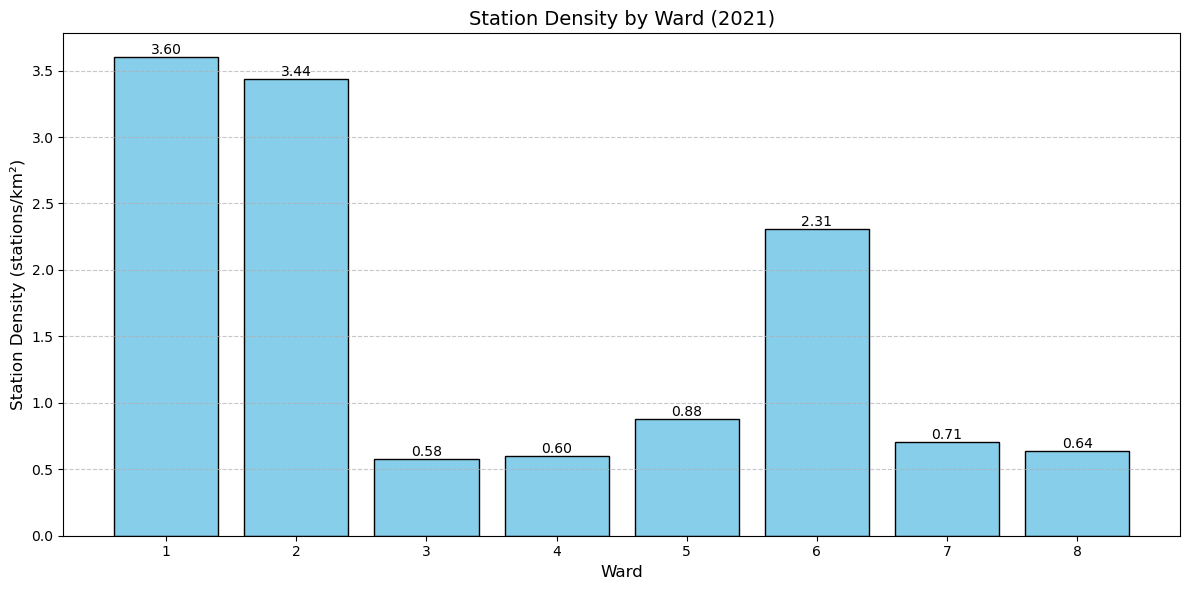

In [133]:
import matplotlib.pyplot as plt

# Assuming ward_density_unique is the dataframe with 'WARD' and 'station_density' columns
station_density_by_ward = ward_density_unique[['WARD', 'station_density']]

# Sort the dataframe by the 'WARD' column
station_density_by_ward = station_density_by_ward.sort_values(by='WARD')

# Creating a figure with a larger size
plt.figure(figsize=(12, 6))

# Plotting the bar chart
bars = plt.bar(station_density_by_ward['WARD'], station_density_by_ward['station_density'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

# Adding labels and title
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Station Density (stations/km²)', fontsize=12)
plt.title('Station Density by Ward (2021)', fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # To ensure everything fits without overlap
plt.show()

In [129]:
# import pandas as pd
# import geopandas as gpd

# # Ensure ward column types match
# fdf_gdf21['start_ward'] = fdf_gdf21['start_ward'].astype(str)
# fdf_gdf21['end_ward'] = fdf_gdf21['end_ward'].astype(str)
# wards_gdf['WARD'] = wards_gdf['WARD'].astype(str)

# # Reproject the wards GeoDataFrame to a projected CRS (e.g., EPSG:3395 for global, EPSG:3035 for Europe)
# # EPSG:3395 is an example of a global projected CRS (WGS 84/Pseudo Mercator), or you could use a local one like EPSG:3035 (ETRS89)

# wards_gdf = wards_gdf.to_crs(epsg=3395)  # Change this CRS based on your region's needs

# # Calculate the area in square meters and convert to square kilometers
# wards_gdf['area_km2'] = wards_gdf['geometry'].area / 1e6  # Area in km²

# # Get unique stations per ward (start and end separately)
# unique_start_stations = fdf_gdf21[['start_ward', 'start_station_name']].drop_duplicates()
# unique_end_stations = fdf_gdf21[['end_ward', 'end_station_name']].drop_duplicates()

# # Count unique stations per ward
# start_station_counts = unique_start_stations.groupby('start_ward')['start_station_name'].nunique()
# end_station_counts = unique_end_stations.groupby('end_ward')['end_station_name'].nunique()

# # Combine counts
# station_counts = pd.DataFrame({
#     'start_station_count': start_station_counts,
#     'end_station_count': end_station_counts
# }).fillna(0)  # Ensure missing wards get 0 stations

# station_counts['total_station_count'] = station_counts['start_station_count'] + station_counts['end_station_count']

# # Merge with ward area
# ward_density = wards_gdf[['WARD', 'area_km2']].merge(station_counts, left_on='WARD', right_index=True, how='left')

# # Ensure missing values are filled (some wards may have no stations)
# ward_density.fillna({'total_station_count': 0}, inplace=True)

# # Calculate station density (stations per km²)
# ward_density['station_density'] = ward_density['total_station_count'] / ward_density['area_km2']

# # Display result
# print(ward_density[['WARD', 'station_density']])


In [132]:
# # Plot staton density - wrong code
# import matplotlib.pyplot as plt

# # Assuming ward_density is the dataframe with 'WARD' and 'station_density' columns
# station_density_by_ward = ward_density[['WARD', 'station_density']]

# # Sort the dataframe by the 'WARD' column
# station_density_by_ward = station_density_by_ward.sort_values(by='WARD')

# # Creating a figure with a larger size
# plt.figure(figsize=(12, 6))

# # Plotting the bar chart
# bars = plt.bar(station_density_by_ward['WARD'], station_density_by_ward['station_density'], color='skyblue', edgecolor='black')

# # Adding data labels on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

# # Adding labels and title
# plt.xlabel('Ward', fontsize=12)
# plt.ylabel('Station Density (stations/km²)', fontsize=12)
# plt.title('Station Density by Ward in Washington DC (2021)', fontsize=14)

# # Adding gridlines for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Display the plot
# plt.tight_layout()  # To ensure everything fits without overlap
# plt.show()


### Check if area_km2 is correct

In [107]:
import geopandas as gpd

# Ensure the CRS is correct (using a local projection for Washington DC)
wards_gdf = wards_gdf.to_crs(epsg=3857)  # Projected CRS for accurate area calculations

# Recompute the area in square kilometers
wards_gdf['computed_area_km2'] = wards_gdf['geometry'].area / 1e6  # Convert from m² to km²

# Compare with the existing area_km2 column
wards_gdf[['area_km2', 'computed_area_km2']].head(10)


,area_km2,computed_area_km2
0,53.199005,53.416555
1,28.996839,29.115261
2,39.505974,39.667300
3,30.231973,30.355376
4,10.831974,10.876157
5,44.380534,44.561548
6,46.686393,46.876755
7,38.462563,38.619265


In [134]:
# saving the dataframe
fdf_gdf21.to_csv('fdf_gdf21.csv')